# Memory Information

In [ ]:
import psutil
def get_size(bytes, suffix="B"):
    factor = 1024
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < factor:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= factor
print("="*40, "Memory Information", "="*40)
svmem = psutil.virtual_memory()
print(f"Total: {get_size(svmem.total)}") ; print(f"Available: {get_size(svmem.available)}")
print(f"Used: {get_size(svmem.used)}") ; print(f"Percentage: {svmem.percent}%")

======================================== Memory Information ========================================
Total: 25.51GB
Available: 24.59GB
Used: 592.92MB
Percentage: 3.6%


# GPU Information

In [ ]:
! nvidia-smi

Wed Nov  4 01:32:57 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from PIL import Image
import numpy as np

from os import path


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive

/content/drive/My Drive


In [ ]:
!unzip \*.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: fruits-mini/Test/Apricot/42_100.jpg  
  inflating: fruits-mini/Test/Apricot/43_100.jpg  
  inflating: fruits-mini/Test/Apricot/44_100.jpg  
  inflating: fruits-mini/Test/Apricot/45_100.jpg  
  inflating: fruits-mini/Test/Apricot/46_100.jpg  
  inflating: fruits-mini/Test/Apricot/47_100.jpg  
  inflating: fruits-mini/Test/Apricot/48_100.jpg  
  inflating: fruits-mini/Test/Apricot/49_100.jpg  
  inflating: fruits-mini/Test/Apricot/5_100.jpg  
  inflating: fruits-mini/Test/Apricot/50_100.jpg  
  inflating: fruits-mini/Test/Apricot/51_100.jpg  
  inflating: fruits-mini/Test/Apricot/52_100.jpg  
  inflating: fruits-mini/Test/Apricot/53_100.jpg  
  inflating: fruits-mini/Test/Apricot/54_100.jpg  
  inflating: fruits-mini/Test/Apricot/55_100.jpg  
  inflating: fruits-mini/Test/Apricot/56_100.jpg  
  inflating: fruits-mini/Test/Apricot/57_100.jpg  
  inflating: fruits-mini/Test/Apricot/58_100.jpg  
  inflating: fruits-mi

In [ ]:
#borrar imgs corruptas (reemplazar Test por Train o viceversa)


import os
import tensorflow as tf


num_skipped = 0
for folder_name in ( "andina","colun","duracell","nestle","coca-cola","pepsi","soprole","watts","axe","ballerina","becker","bresler","chamonix","dos caballos","energizer","escudo","glade","quix"):
    folder_path = os.path.join("Brand Data/Train", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

FileNotFoundError: ignored

In [ ]:
# preprocesamiento de imgs

datagen_tr = ImageDataGenerator( rescale = 1./255,validation_split=0.19,width_shift_range=[-200,200],height_shift_range=0.5,rotation_range=60)

#datagen_tr = ImageDataGenerator( rescale = 1./255,validation_split=0.19,width_shift_range=[-200,200],height_shift_range=0.5)
datagen_ts = ImageDataGenerator( rescale = 1./255)

data_tr = datagen_tr.flow_from_directory('fruits-mini/Training', target_size = (256, 256), batch_size = 32,class_mode = 'categorical',subset='training')

data_val = datagen_tr.flow_from_directory('fruits-mini/Training', target_size = (256, 256), batch_size = 32,class_mode = 'categorical',subset='validation')

data_train = datagen_ts.flow_from_directory('fruits-mini/Training', target_size = (256, 256), batch_size = 32, shuffle=False, class_mode = "categorical")

Found 3124 images belonging to 8 classes.
Found 730 images belonging to 8 classes.
Found 3854 images belonging to 8 classes.


In [ ]:
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense

#optimizer = optim.SGD(cnn.parameters(), lr=0.001, momentum=0.9)
from keras.applications.nasnet import NASNetLarge

#usar resnet18


base_model=NASNetLarge(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(100,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(30,activation='relu')(x) #dense layer 2
preds=Dense(8,activation='softmax')(x) #final layer with softmax activation

In [ ]:
from keras.models import Model

model = Model(inputs=base_model.input, outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 331, 331, 3) 0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 165, 165, 96) 2592        input_2[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 165, 165, 96) 384         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_260 (Activation)     (None, 165, 165, 96) 0           stem_bn1[0][0]                   
_______________________________________________________________________________________

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

adam = tf.keras.optimizers.Adam(lr=0.0001)
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer=adam, loss='categorical_crossentropy')

history = model.fit(data_tr, steps_per_epoch = 97, verbose=True,epochs = 8, validation_data = data_val, validation_steps = 22)

Epoch 1/8
97/97 [==============================] - 76s 784ms/step - loss: 1.3861 - val_loss: 0.9226
Epoch 2/8
97/97 [==============================] - 70s 723ms/step - loss: 0.7009 - val_loss: 0.6446
Epoch 3/8
97/97 [==============================] - 70s 721ms/step - loss: 0.5026 - val_loss: 0.5138
Epoch 4/8
97/97 [==============================] - 70s 720ms/step - loss: 0.3973 - val_loss: 0.4646
Epoch 5/8
97/97 [==============================] - 70s 720ms/step - loss: 0.3330 - val_loss: 0.3920
Epoch 6/8
97/97 [==============================] - 70s 721ms/step - loss: 0.2862 - val_loss: 0.3687
Epoch 7/8
97/97 [==============================] - 70s 717ms/step - loss: 0.2604 - val_loss: 0.2739
Epoch 8/8
97/97 [==============================] - 69s 714ms/step - loss: 0.2308 - val_loss: 0.2689


In [ ]:
from keras.optimizers import SGD

for layer in model.layers[:1035]:
    layer.trainable=False
for layer in model.layers[1035:]:
    layer.trainable=True

#model.save_weights(initial_weights)

import keras
from keras import backend as K
import tensorflow as tf


gamma = 2.0
alpha = 0.25

def categorical_focal_loss(alpha, gamma=2.):
    """
    Softmax version of focal loss.
    When there is a skew between different categories/labels in your data set, you can try to apply this function as a
    loss.
           m
      FL = ∑  -alpha * (1 - p_o,c)^gamma * y_o,c * log(p_o,c)
          c=1
      where m = number of classes, c = class and o = observation
    Parameters:
      alpha -- the same as weighing factor in balanced cross entropy. Alpha is used to specify the weight of different
      categories/labels, the size of the array needs to be consistent with the number of classes.
      gamma -- focusing parameter for modulating factor (1-p)
    Default value:
      gamma -- 2.0 as mentioned in the paper
      alpha -- 0.25 as mentioned in the paper
    References:
        Official paper: https://arxiv.org/pdf/1708.02002.pdf
        https://www.tensorflow.org/api_docs/python/tf/keras/backend/categorical_crossentropy
    Usage:
     model.compile(loss=[categorical_focal_loss(alpha=[[.25, .25, .25]], gamma=2)], metrics=["accuracy"], optimizer=adam)
    """

    alpha = np.array(alpha, dtype=np.float32)

    def categorical_focal_loss_fixed(y_true, y_pred):
        """
        :param y_true: A tensor of the same shape as `y_pred`
        :param y_pred: A tensor resulting from a softmax
        :return: Output tensor.
        """

        # Clip the prediction value to prevent NaN's and Inf's
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)

        # Calculate Cross Entropy
        cross_entropy = -y_true * K.log(y_pred)

        # Calculate Focal Loss
        loss = alpha * K.pow(1 - y_pred, gamma) * cross_entropy

        # Compute mean loss in mini_batch
        return K.mean(K.sum(loss, axis=-1))

    return categorical_focal_loss_fixed



# Compile our model
adam = tf.keras.optimizers.Adam(lr=0.0001)
#model.compile(loss=[categorical_focal_loss(alpha=[[.25, .25, .25,.25, .25, .25,.25, .25, .25,0.25]], gamma=2)], metrics=["accuracy"], optimizer=adam) 

#model.compile(optimizer = "adam", loss="categorical_crossentropy", metrics = ['accuracy'])

model.compile(optimizer =adam, loss="categorical_crossentropy", metrics = ['accuracy'])

In [ ]:

for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

0 input_1
1 stem_conv1
2 stem_bn1
3 activation
4 reduction_conv_1_stem_1
5 reduction_bn_1_stem_1
6 activation_1
7 activation_3
8 separable_conv_1_pad_reduction_left1_stem_1
9 separable_conv_1_pad_reduction_right1_stem_1
10 separable_conv_1_reduction_left1_stem_1
11 separable_conv_1_reduction_right1_stem_1
12 separable_conv_1_bn_reduction_left1_stem_1
13 separable_conv_1_bn_reduction_right1_stem_1
14 activation_2
15 activation_4
16 separable_conv_2_reduction_left1_stem_1
17 separable_conv_2_reduction_right1_stem_1
18 activation_5
19 separable_conv_2_bn_reduction_left1_stem_1
20 separable_conv_2_bn_reduction_right1_stem_1
21 separable_conv_1_pad_reduction_right2_stem_1
22 activation_7
23 reduction_add_1_stem_1
24 separable_conv_1_reduction_right2_stem_1
25 separable_conv_1_pad_reduction_right3_stem_1
26 activation_9
27 separable_conv_1_bn_reduction_right2_stem_1
28 separable_conv_1_reduction_right3_stem_1
29 separable_conv_1_reduction_left4_stem_1
30 activation_6
31 separable_conv_1_bn_r

In [ ]:
history = model.fit(data_tr, steps_per_epoch = 97, verbose=True,epochs = 15, validation_data = data_val, validation_steps = 22)

Epoch 1/15
97/97 [==============================] - 76s 782ms/step - loss: 0.2255 - accuracy: 0.9292 - val_loss: 0.3062 - val_accuracy: 0.9077
Epoch 2/15
97/97 [==============================] - 69s 714ms/step - loss: 0.2058 - accuracy: 0.9402 - val_loss: 0.2576 - val_accuracy: 0.9247
Epoch 3/15
97/97 [==============================] - 69s 710ms/step - loss: 0.1911 - accuracy: 0.9444 - val_loss: 0.2940 - val_accuracy: 0.9006
Epoch 4/15
97/97 [==============================] - 69s 708ms/step - loss: 0.1801 - accuracy: 0.9489 - val_loss: 0.2534 - val_accuracy: 0.9105
Epoch 5/15
97/97 [==============================] - 69s 708ms/step - loss: 0.1632 - accuracy: 0.9499 - val_loss: 0.2452 - val_accuracy: 0.9290
Epoch 6/15
97/97 [==============================] - 69s 708ms/step - loss: 0.1701 - accuracy: 0.9505 - val_loss: 0.2339 - val_accuracy: 0.9219
Epoch 7/15
97/97 [==============================] - 69s 712ms/step - loss: 0.1521 - accuracy: 0.9573 - val_loss: 0.2070 - val_accuracy: 0.9347

Text(0.5, 1.0, 'Accuracy Curves')

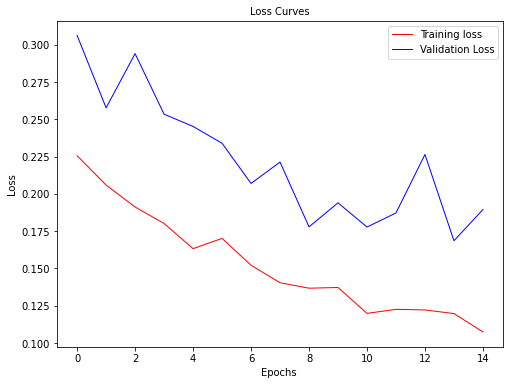

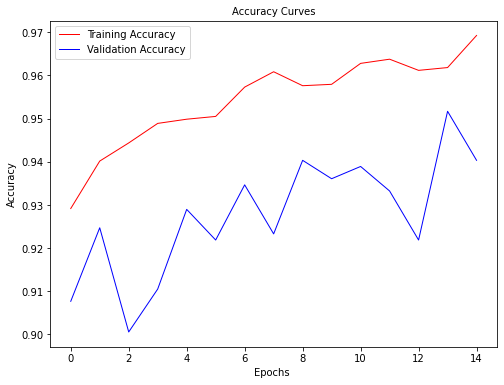

In [ ]:
#Gráfico de loss del modelo 1 (comparación de conjunto de validación con el de entrenamiento)
import matplotlib.pyplot as plt

plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=1.0)
plt.plot(history.history['val_loss'],'b',linewidth=1.0)
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs ',fontsize=10)
plt.ylabel('Loss',fontsize=10)
plt.title('Loss Curves',fontsize=10)


#Gráfico de accuracy del modelo 1 (comparación de conjunto de validación con el de entrenamiento)

plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=1.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=1.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs ',fontsize=10)
plt.ylabel('Accuracy',fontsize=10)
plt.title('Accuracy Curves',fontsize=10)

In [ ]:
 from sklearn.metrics import accuracy_score
Y_pred = model.predict(data_ts)
y_pred =np.argmax(Y_pred, axis=1)

print("Acc score: ",accuracy_score(data_ts.classes,y_pred))


Acc score:  0.8531684698608965


Text(0.5, 15.0, 'Predicted label')

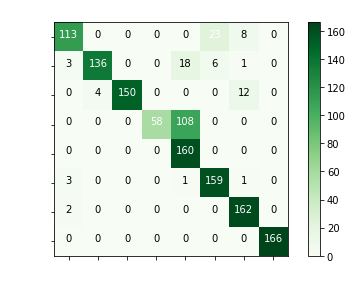

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

confusion_mtx = confusion_matrix(data_ts.classes,y_pred) 
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('confusion_matrix',color="white")
plt.colorbar()
tick_marks = np.arange(8)
plt.xticks(tick_marks, ['APP',"APR","BAN","MAN","ORA","PEA",'PEAR','BAN'],color="white")
plt.yticks(tick_marks, ["APP","APR","BAN","MAN","ORA","PEA",'PEAR','BAN'],color="white")
#Following is to mention the predicated numbers in the plot and highligh the numbers the most predicted number for particular label
thresh = confusion_mtx.max() / 8.
for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
    plt.text(j, i, confusion_mtx[i, j],
    horizontalalignment="center",
    color="white" if confusion_mtx[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label',color="white")
plt.xlabel('Predicted label',color="white")

In [ ]:
from keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()
with open("Fruit_XCeptionS2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("Fruit_XCeptionS2.hdf5")
print("Saved model to disk")

#model.save("From_scratchV1.h5")

Saved model to disk


In [ ]:
!python --version
from keras.models import model_from_json
import tensorflow as tf


Python 3.6.9


In [ ]:
json_file = open('/content/Brand_InceptionResNetnetV2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)





In [ ]:
loaded_model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.functional.Functional object at 0x7f14f74c2fd0>>

In [ ]:
loaded_model

In [ ]:
model_json = loaded_model.to_json()
with open("Brand_NASNetLargetV2.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
#modelo externo de paper

# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K

class LeNet:
	@staticmethod
	def build(width, height, depth, classes):
		# initialize the model
		model = Sequential()
		inputShape = (height, width, depth)

		# if we are using "channels first", update the input shape
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)

		# first set of CONV => RELU => POOL layers
		model.add(Conv2D(20, (5, 5), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

		# second set of CONV => RELU => POOL layers
		model.add(Conv2D(50, (5, 5), padding="same"))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

		# first (and only) set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(500))
		model.add(Activation("relu"))

		# softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		# return the constructed network architecture
		return model

In [ ]:
opt = SGD(lr=0.005)
model = LeNet.build(width=256, height=256, depth=3, classes=18)

model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

In [ ]:
history = model.fit(data_tr, steps_per_epoch = 72, verbose=True,epochs = 15, validation_data = data_val, validation_steps = 16)

Epoch 1/15
72/72 [==============================] - 70s 971ms/step - loss: 2.7916 - accuracy: 0.0938 - val_loss: 2.7278 - val_accuracy: 0.1270
Epoch 2/15
72/72 [==============================] - 68s 941ms/step - loss: 2.7325 - accuracy: 0.1260 - val_loss: 2.7084 - val_accuracy: 0.1230
Epoch 3/15
72/72 [==============================] - 68s 940ms/step - loss: 2.7088 - accuracy: 0.1295 - val_loss: 2.7025 - val_accuracy: 0.1367
Epoch 4/15
72/72 [==============================] - 68s 945ms/step - loss: 2.6909 - accuracy: 0.1216 - val_loss: 2.7212 - val_accuracy: 0.1074
Epoch 5/15
72/72 [==============================] - 68s 948ms/step - loss: 2.6797 - accuracy: 0.1381 - val_loss: 2.6920 - val_accuracy: 0.1016
Epoch 6/15
72/72 [==============================] - 68s 943ms/step - loss: 2.6675 - accuracy: 0.1355 - val_loss: 2.6736 - val_accuracy: 0.1250
Epoch 7/15
72/72 [==============================] - 69s 955ms/step - loss: 2.6702 - accuracy: 0.1338 - val_loss: 2.6792 - val_accuracy: 0.1348

UnknownError: ignored

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import base64
import numpy as np
import io
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from keras.models import load_model, model_from_json
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from flask import request
from flask import jsonify
from flask import Flask
import cv2
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.models import Model




def load_json(model_json, model_weight):
    json_file = open(model_json, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights(model_weight)

    return loaded_model

def load_models(model_trashnet, model_trashnet_weight):
    

    model_for_trashnet = load_json(model_trashnet, model_trashnet_weight)

    return model_for_trashnet


model_fruits_rec = "Fruit_NASNetLarge.json"
model_fruits_rec_weight = 'Fruit_NASNetLargeS2.hdf5'




#load models
model_for_fruits_rec = load_models( model_fruits_rec,model_fruits_rec_weight)

print('model loaded')

model loaded


In [ ]:
 from sklearn.metrics import accuracy_score
Y_pred = model_for_fruits_rec.predict(data_train)
y_pred =np.argmax(Y_pred, axis=1)

print("Acc score fruits recognition (train): ",accuracy_score(data_train.classes,y_pred))

Acc score fruits recognition (train):  0.873897249610794


Text(0.5, 15.0, 'Predicted label')

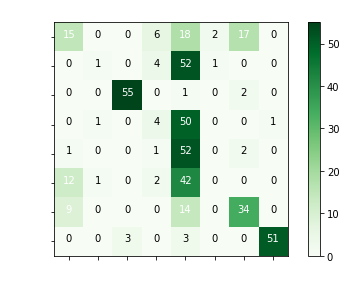

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

confusion_mtx = confusion_matrix(data_ts.classes,y_pred) 
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('confusion_matrix',color="white")
plt.colorbar()
tick_marks = np.arange(8)
plt.xticks(tick_marks, ['APP',"APR","BAN","MAN","ORA","PEA",'PEAR','PIN'],color="white")
plt.yticks(tick_marks, ["APP","APR","BAN","MAN","ORA","PEA",'PEAR','PIN'],color="white")
#Following is to mention the predicated numbers in the plot and highligh the numbers the most predicted number for particular label
thresh = confusion_mtx.max() / 8.
for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
    plt.text(j, i, confusion_mtx[i, j],
    horizontalalignment="center",
    color="white" if confusion_mtx[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label',color="white")
plt.xlabel('Predicted label',color="white")